In [ ]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 61.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 93.1 MB/s eta 0:00:00


In [7]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 74.6 MB/s eta 0:00:00


In [4]:
import pandas as pd 
df_global = pd.read_parquet('./final_df_merged_with_legal_topic.parquet')
df_global.columns

Index(['file', 'message', 'parsed_email', 'Message-ID', 'X-FileName', 'Body',
       'final_body', 'embedding', 'spam', 'From', 'KMeans_Labels',
       'hdbscan_cluster', 'common_topic', 'is_legal'],
      dtype='object')

In [5]:
df_global.dtypes

file               object
message            object
parsed_email       object
Message-ID         object
X-FileName         object
Body               object
final_body         object
embedding          object
spam                int64
From               object
KMeans_Labels       int32
hdbscan_cluster     int64
common_topic       object
is_legal           object
dtype: object

In [10]:
df = df_global

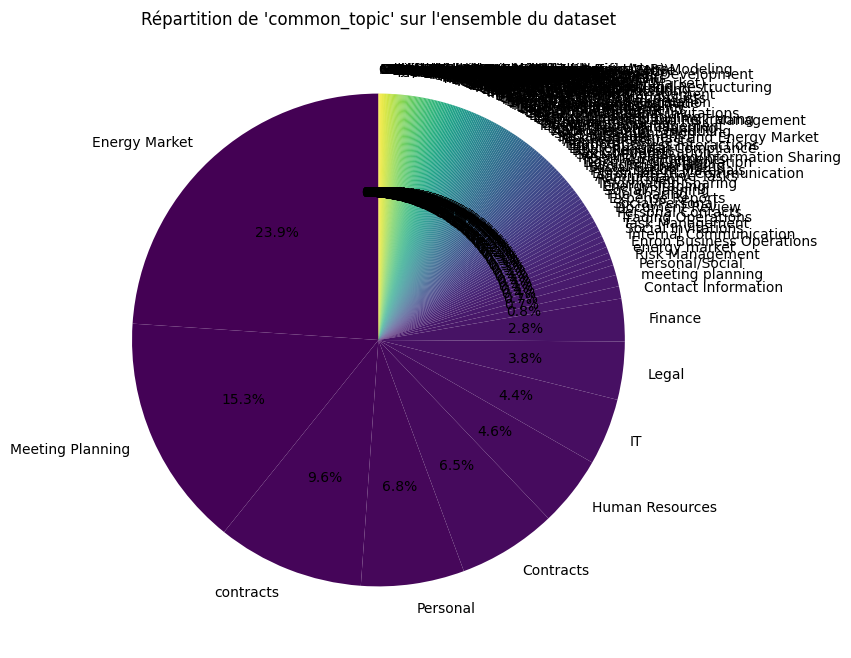

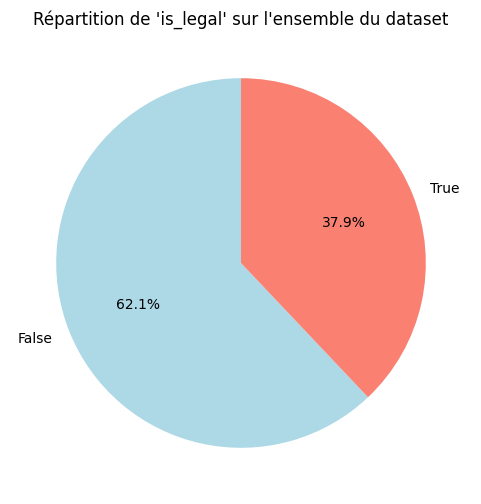

In [15]:
# Calcul de la fréquence globale de 'common_topic'
common_topic_frequency = df['common_topic'].value_counts(normalize=True) * 100

# Calcul de la fréquence globale de 'is_legal'
is_legal_frequency = df['is_legal'].value_counts(normalize=True) * 100

# Création du Pie Chart pour 'common_topic'
plt.figure(figsize=(8, 8))
common_topic_frequency.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', legend=False)
plt.title("Répartition de 'common_topic' sur l'ensemble du dataset")
plt.ylabel('')  # Supprimer le label y
plt.show()

# Création du Pie Chart pour 'is_legal'
plt.figure(figsize=(6, 6))
is_legal_frequency.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'], legend=False)
plt.title("Répartition de 'is_legal' sur l'ensemble du dataset")
plt.ylabel('')  # Supprimer le label y
plt.show()


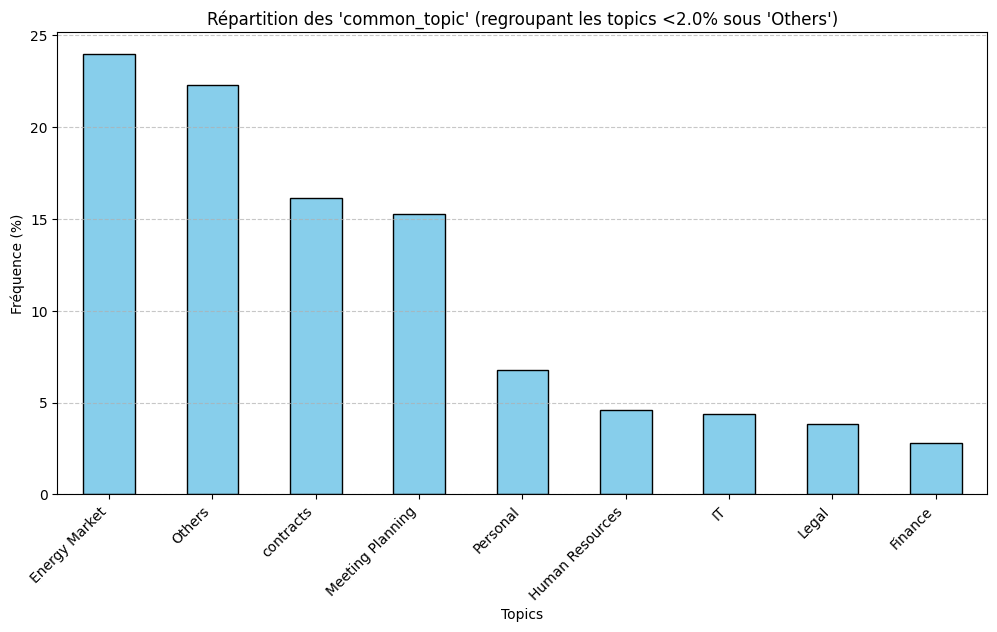

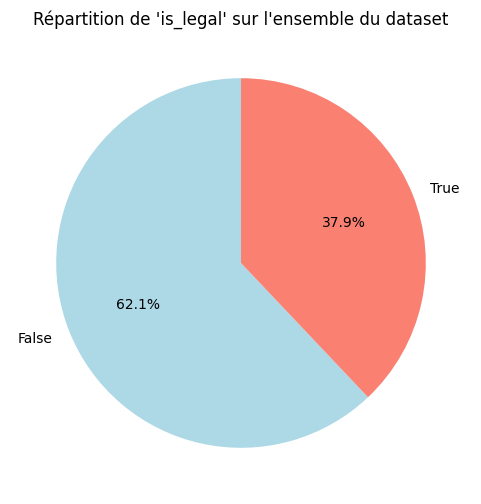

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcul de la fréquence globale de 'common_topic'
common_topic_frequency = df['common_topic'].value_counts(normalize=True) * 100

# Seuil pour regrouper les valeurs inférieures à ce seuil sous "Others"
threshold = 2.0

# Séparer les topics fréquents et ceux à regrouper sous "Others"
common_topic_filtered = common_topic_frequency[common_topic_frequency >= threshold]
others_total = common_topic_frequency[common_topic_frequency < threshold].sum()

# Ajouter "Others" à la série
#common_topic_filtered = pd.concat([common_topic_filtered, pd.Series({'Others': others_total})])

# Création du Bar Chart pour 'common_topic'
plt.figure(figsize=(12, 6))
common_topic_filtered.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Répartition des 'common_topic' (regroupant les topics <2.0% sous 'Others')")
plt.xlabel("Topics")
plt.ylabel("Fréquence (%)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calcul de la fréquence globale de 'is_legal'
is_legal_frequency = df['is_legal'].value_counts(normalize=True) * 100

# Création du Pie Chart pour 'is_legal'
plt.figure(figsize=(6, 6))
is_legal_frequency.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'], legend=False)
plt.title("Répartition de 'is_legal' sur l'ensemble du dataset")
plt.ylabel('')  # Supprimer le label y
plt.show()


In [19]:
import pandas as pd

# Charger ton DataFrame ici si nécessaire
# df = pd.read_csv("chemin_vers_ton_fichier.csv")

# Calcul de la fréquence globale de 'common_topic'
common_topic_frequency = df['common_topic'].value_counts(normalize=True) * 100

# Seuil de regroupement
threshold = 2.0

# Identifier les topics en dessous du seuil
topics_in_others = common_topic_frequency[common_topic_frequency < threshold]

# Afficher les topics qui ont été regroupés sous "Others"
print("Topics regroupés sous 'Others' :")
print(topics_in_others)


Topics regroupés sous 'Others' :
common_topic
Contact Information              0.806716
meeting planning                 0.749556
Personal/Social                  0.669747
Risk Management                  0.424928
energy market                    0.411986
                                   ...   
Market Holidays and Schedules    0.040983
Goal Setting                     0.032355
Energy Market Acquisition        0.030198
Credit Risk                      0.028041
market strategy                  0.024805
Name: proportion, Length: 156, dtype: float64


In [20]:
df.columns

Index(['file', 'message', 'parsed_email', 'Message-ID', 'X-FileName', 'Body',
       'final_body', 'embedding', 'spam', 'From', 'KMeans_Labels',
       'hdbscan_cluster', 'common_topic', 'is_legal'],
      dtype='object')

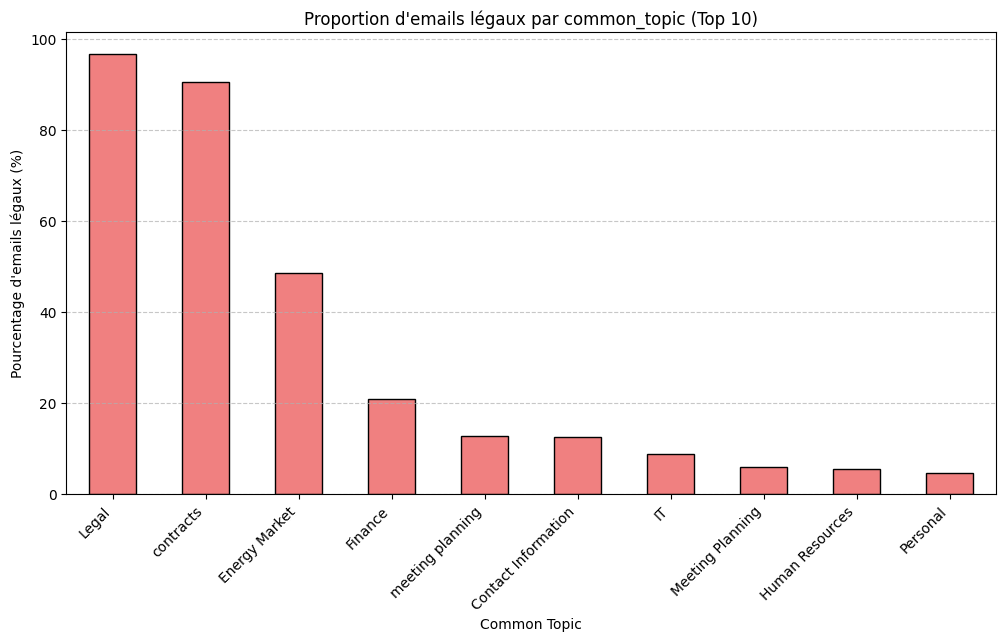

In [25]:
# Mapping des topics mal écrits
topic_corrections = {
    "contracts ": "contracts",  # Suppression d'un espace
    "Contracts": "contracts",   # Correction de majuscule
    "contract": "contracts"     # Uniformisation du singulier/pluriel
}

# Appliquer la correction
df['common_topic'] = df['common_topic'].replace(topic_corrections)

# Calcul de la fréquence des topics
common_topic_frequency = df['common_topic'].value_counts(normalize=True) * 100

# Sélection des 10 topics les plus fréquents
top_10_topics = common_topic_frequency.head(10).index

# Filtrer le DataFrame pour ne garder que les 10 topics les plus fréquents
legal_topic_distribution = df[df['common_topic'].isin(top_10_topics)].groupby('common_topic')['is_legal'].value_counts(normalize=True).unstack().fillna(0) * 100

# Trier par proportion d'emails légaux (True)
legal_topic_sorted = legal_topic_distribution.sort_values(by=True, ascending=False)

# Création du bar chart
plt.figure(figsize=(12, 6))
legal_topic_sorted[True].plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Proportion d'emails légaux par common_topic (Top 10)")
plt.xlabel("Common Topic")
plt.ylabel("Pourcentage d'emails légaux (%)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
